In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/references/emotions.csv")

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/references/synthetic_ecg_with_emotions.csv")

In [ ]:
df.shape

(2132, 2549)

In [ ]:
df1.shape

(2132, 3)

In [ ]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:
df1.head()

,Time,ECG,Emotion
0,0.000000,59.714148,1
1,0.028156,61.862384,2
2,0.056312,63.644540,1
3,0.084467,64.644379,1
4,0.112623,66.579368,1


In [ ]:
X = df1[['ECG']].values
y = df1['Emotion'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 31.62%


In [ ]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 36.53%


In [ ]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")

Gradient Boosting Accuracy: 33.49%


In [ ]:
label=df["label"]

In [ ]:
df.drop("label",axis=1,inplace=True)
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [ ]:
df["ECG"]=df1["ECG"]

In [ ]:
df["label"]=label

In [ ]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,ECG,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,59.714148,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,61.862384,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,63.644540,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,64.644379,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,66.579368,NEUTRAL


In [ ]:
df.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_747_b     0
fft_748_b     0
fft_749_b     0
ECG           0
label         0
Length: 2550, dtype: int64

In [ ]:
df.shape

(2132, 2550)

In [ ]:
df.to_csv("Emotions_of_EEG_ECG.csv")

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/references/Emotions_of_EEG_ECG.csv")

In [ ]:
df.head()

,Unnamed: 0,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,...,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,ECG,label
0,0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,...,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,59.714148,NEGATIVE
1,1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,...,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,61.862384,NEUTRAL
2,2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,...,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,63.644540,POSITIVE
3,3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,...,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,64.644379,POSITIVE
4,4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,...,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,66.579368,NEUTRAL


In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df.shape

(2132, 2550)

In [ ]:
pos=df.loc[df["label"]=="POSITIVE"]
sample_pos=pos.loc[2,'fft_0_b':'fft_749_b']
print(pos.shape,sample_pos.shape)

(708, 2550) (750,)


In [ ]:
neg = df.loc[df["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
print(neg.shape,sample_neg.shape)

(708, 2550) (750,)


In [ ]:
neu = df.loc[df["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']
print(neu.shape,sample_neu.shape)

(716, 2550) (750,)


<ipython-input-39-a6256ab70cb8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df,palette=["red","blue","yellow"])


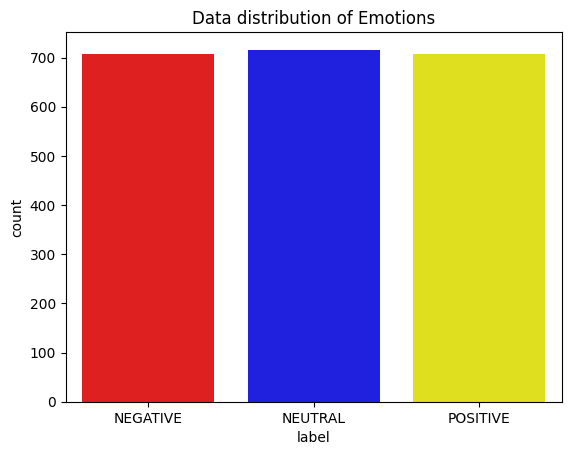

In [ ]:
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=df,palette=["red","blue","yellow"])
plt.show()

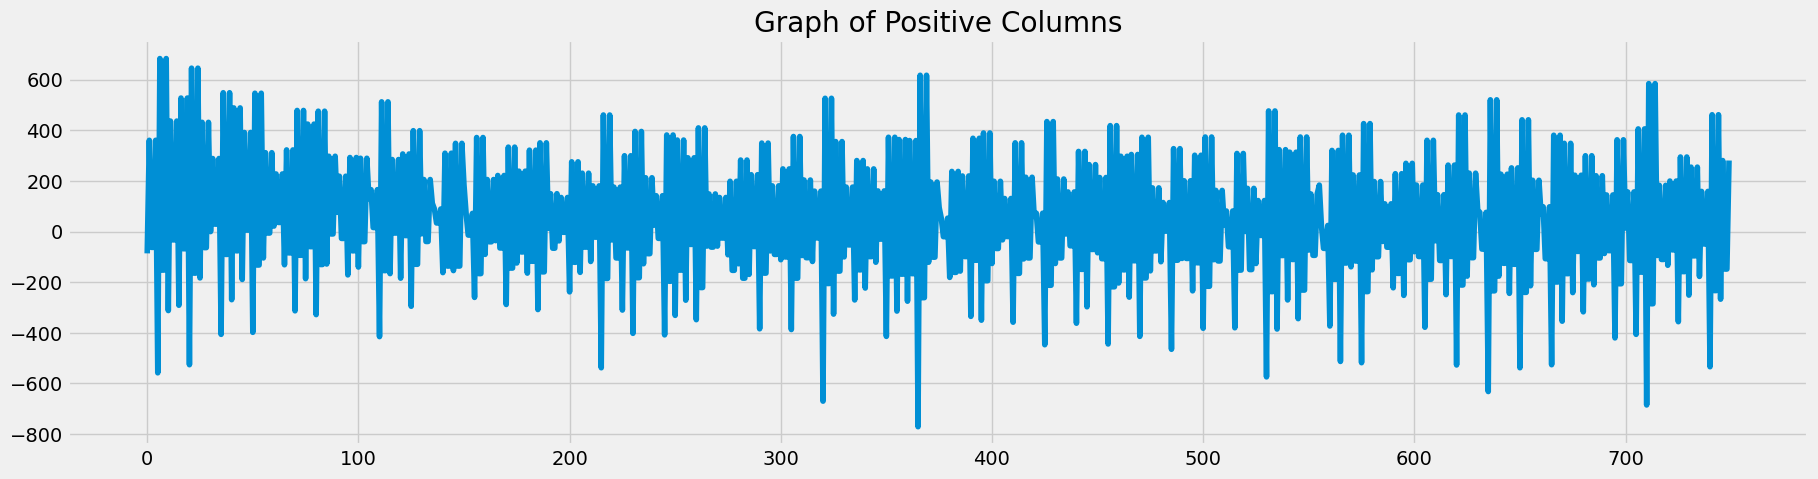

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()

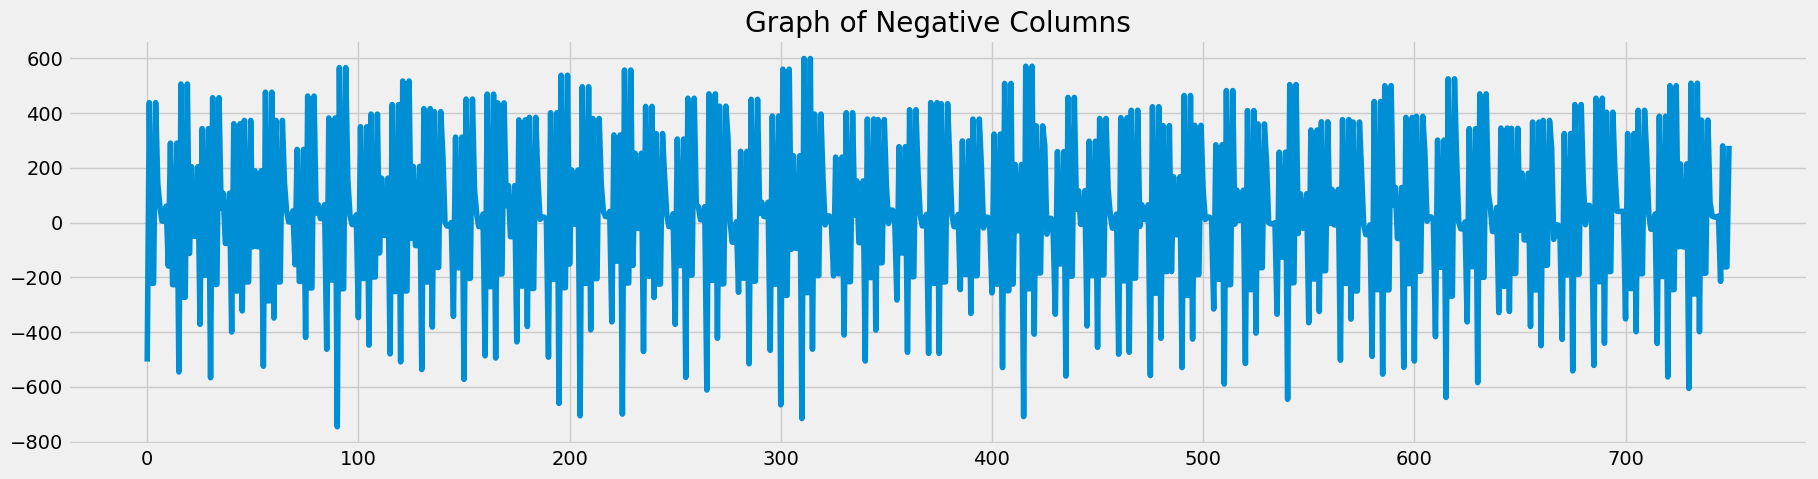

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()

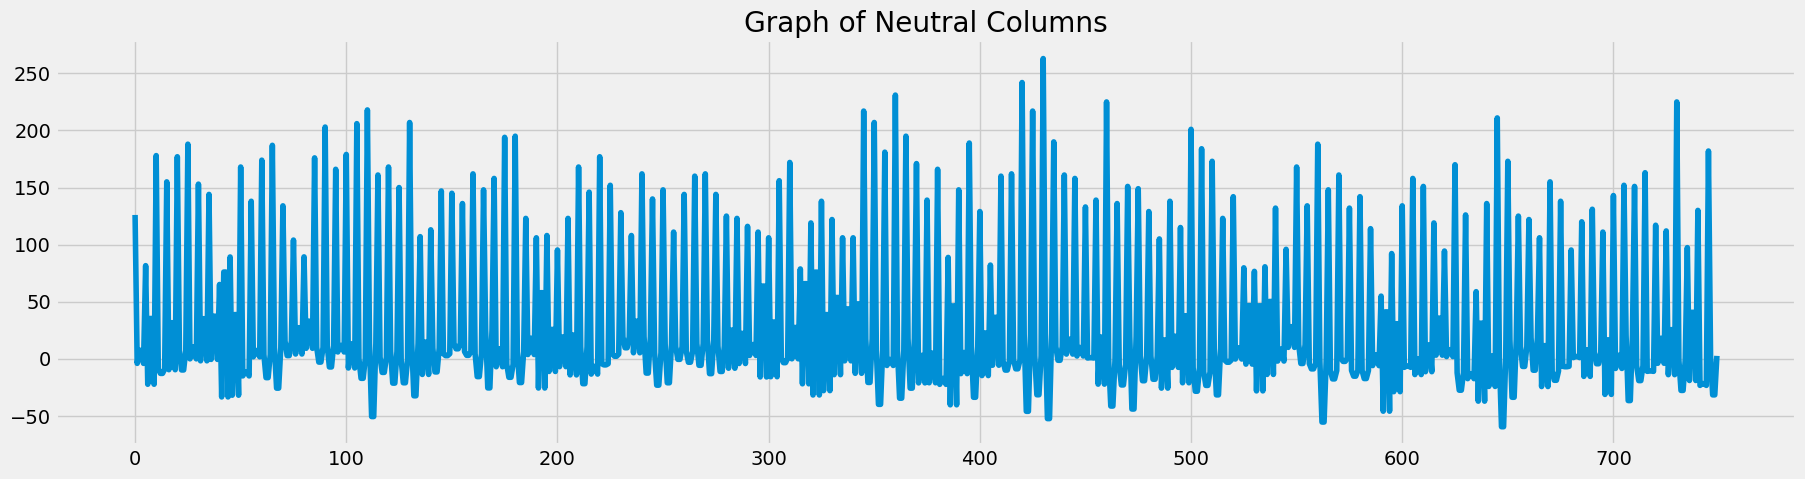

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

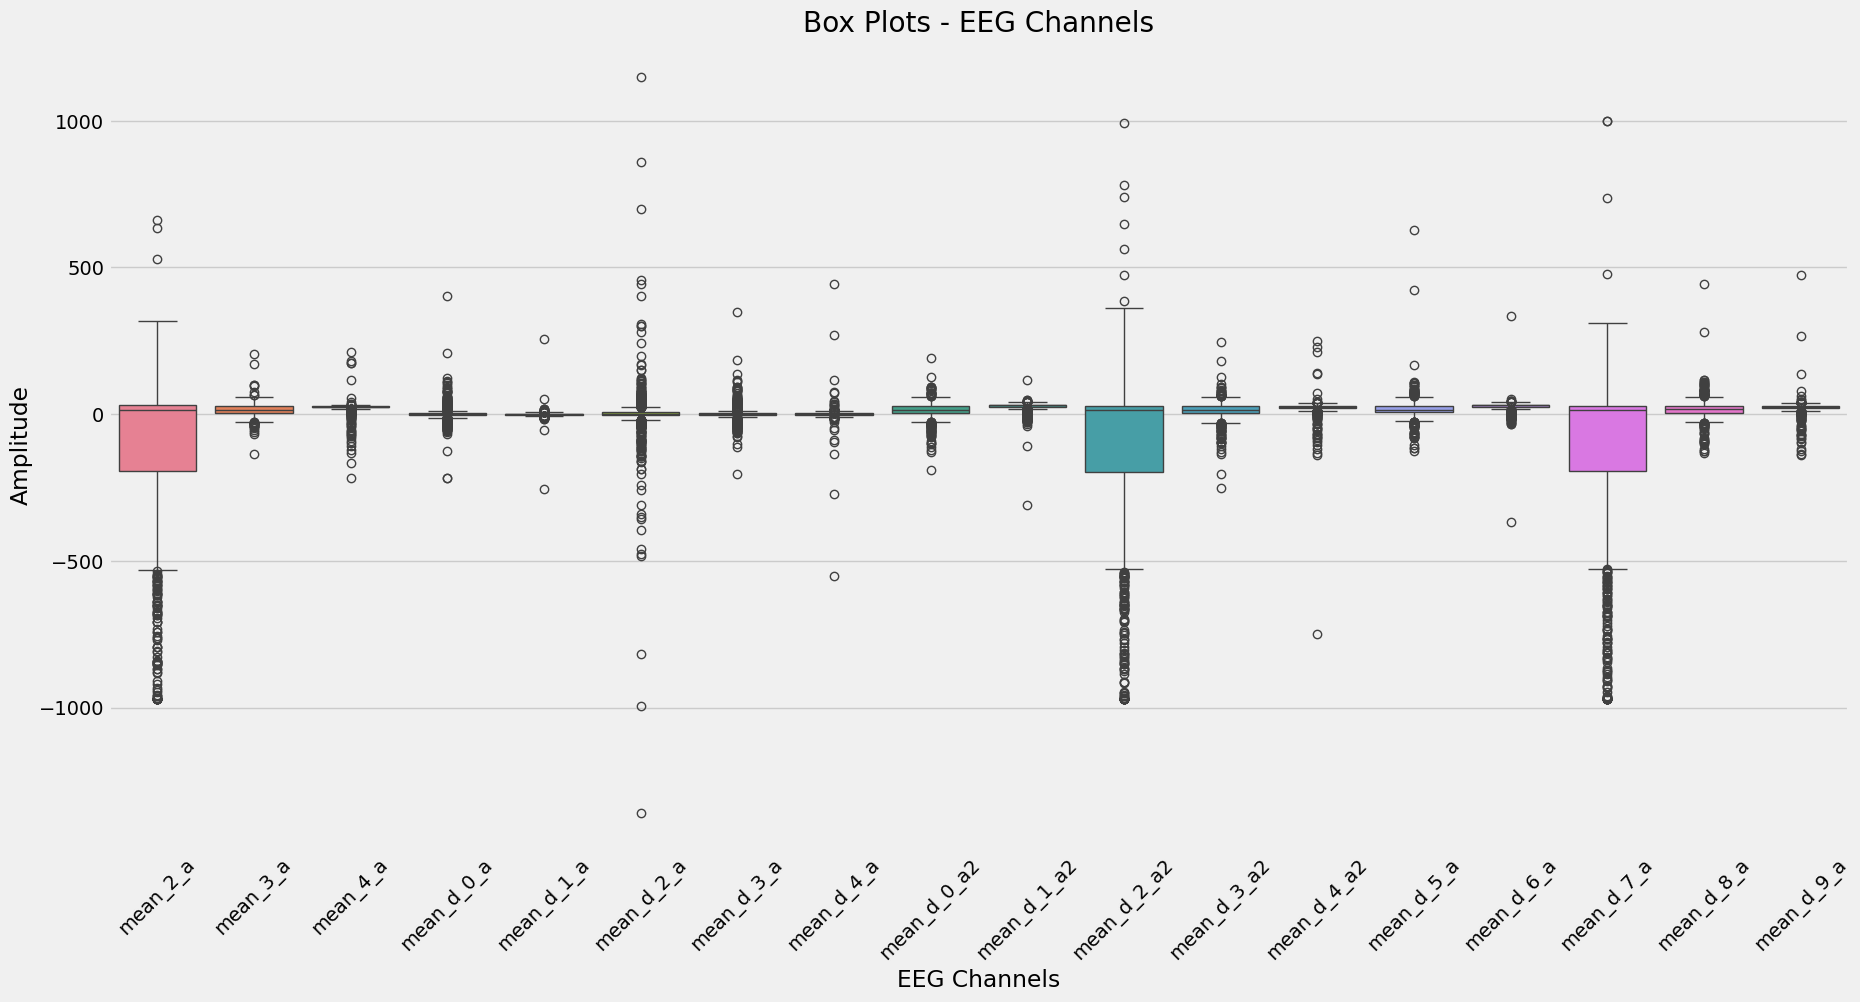

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.loc[:, "mean_2_a":"mean_d_9_a"])
plt.xlabel('EEG Channels')
plt.ylabel('Amplitude')
plt.title('Box Plots - EEG Channels')
plt.xticks(rotation=45)
plt.show()

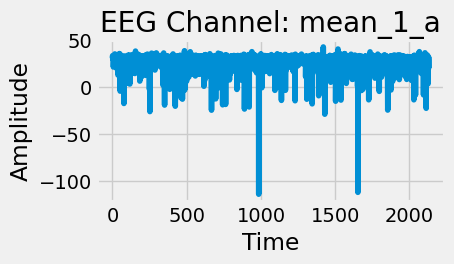

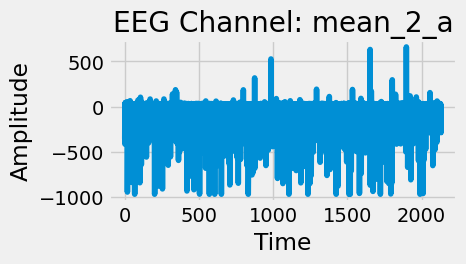

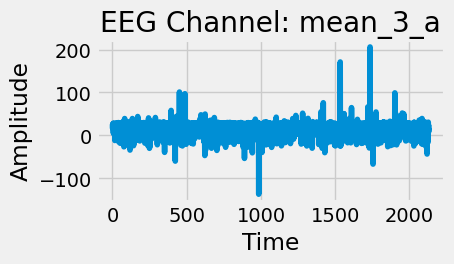

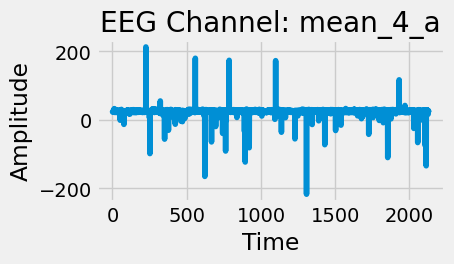

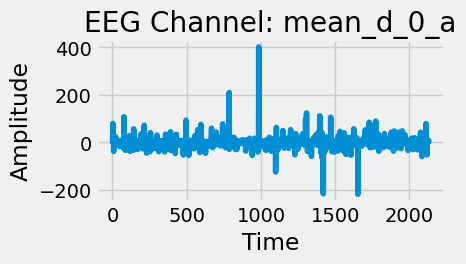

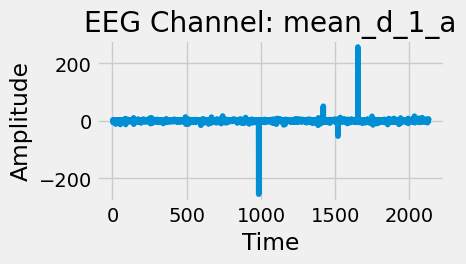

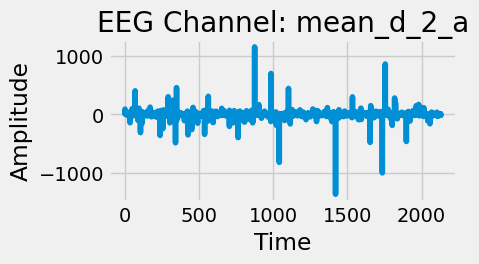

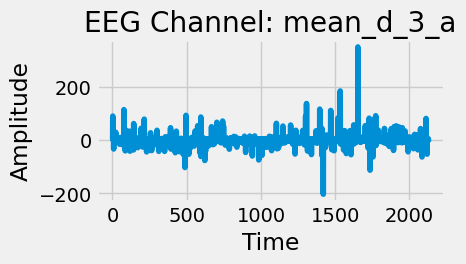

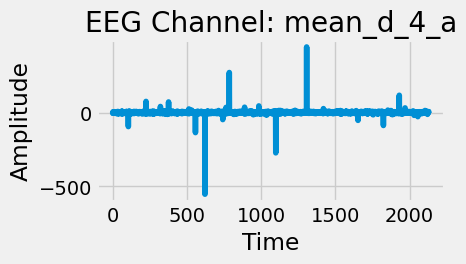

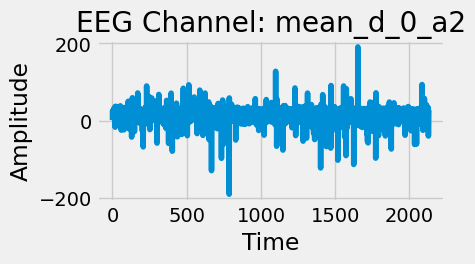

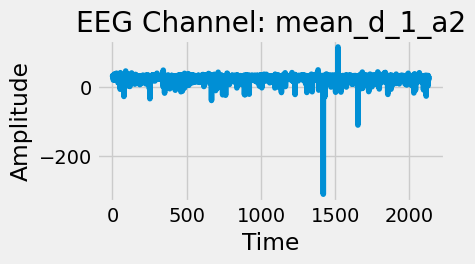

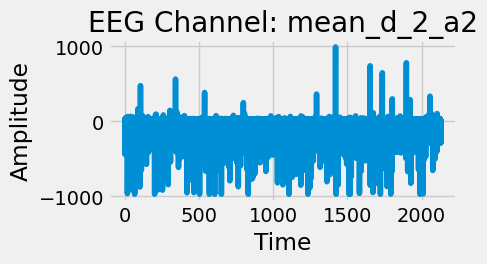

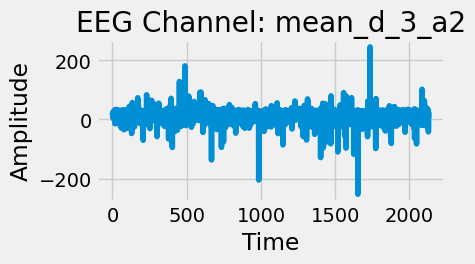

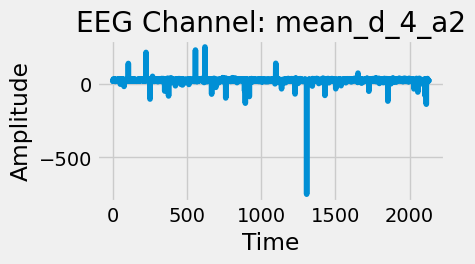

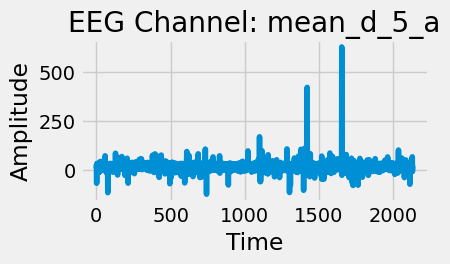

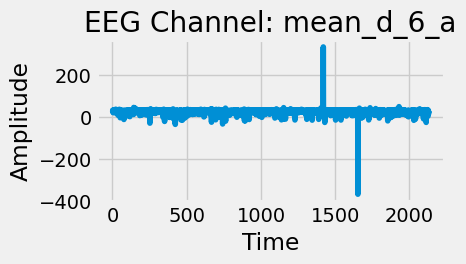

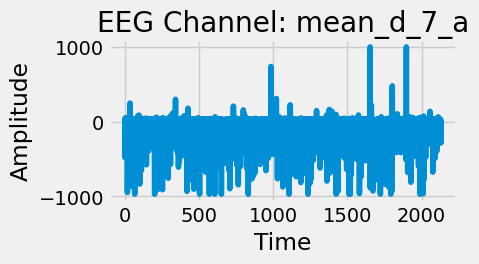

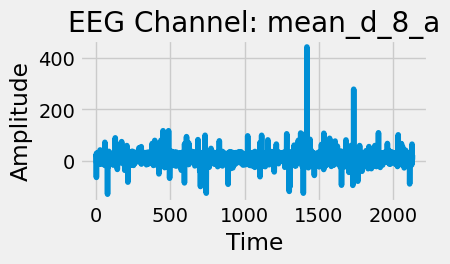

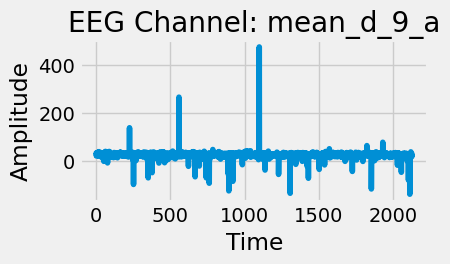

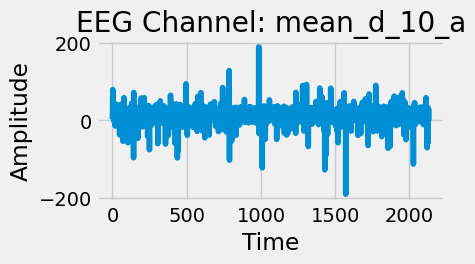

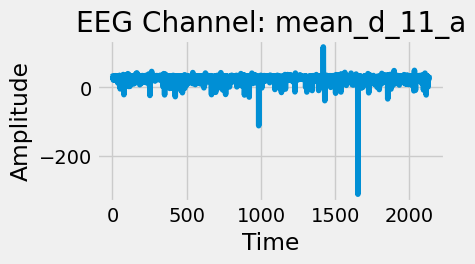

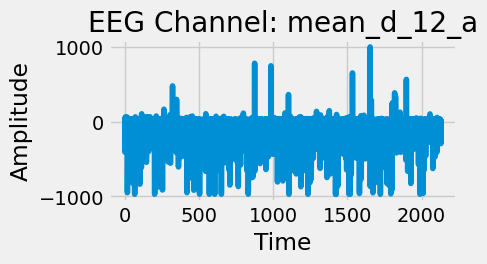

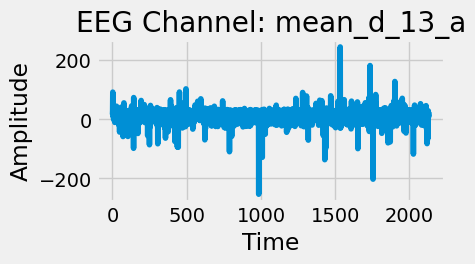

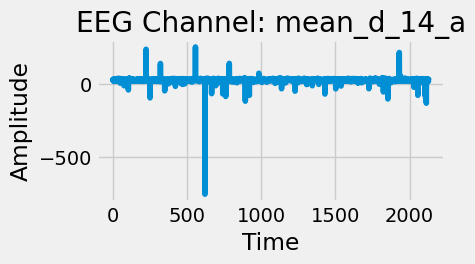

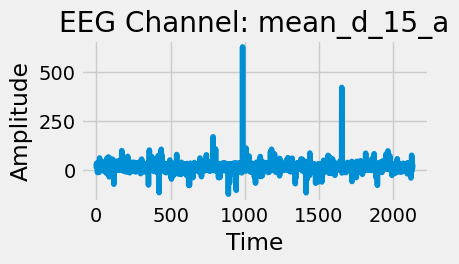

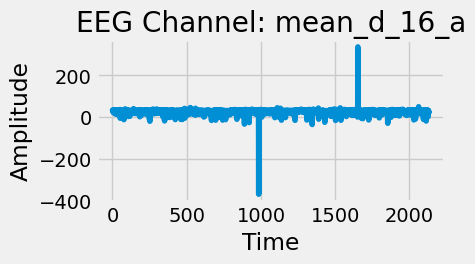

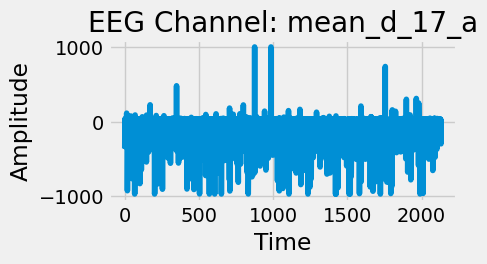

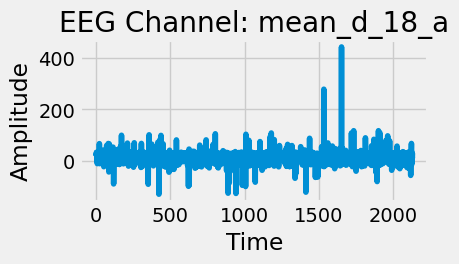

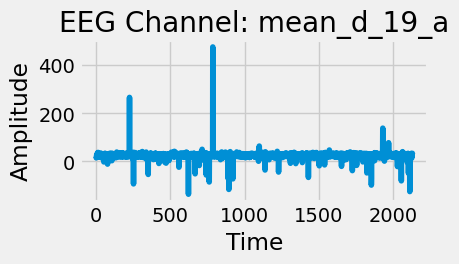

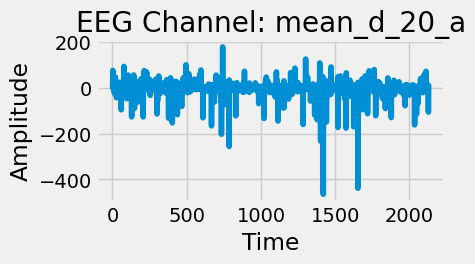

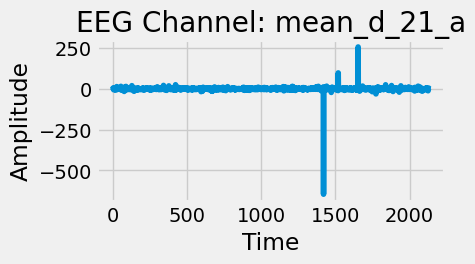

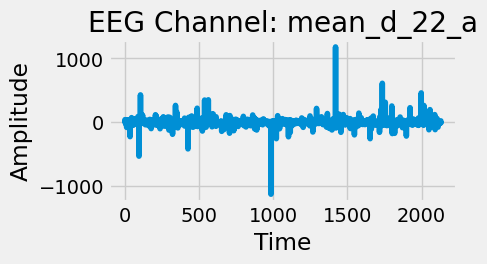

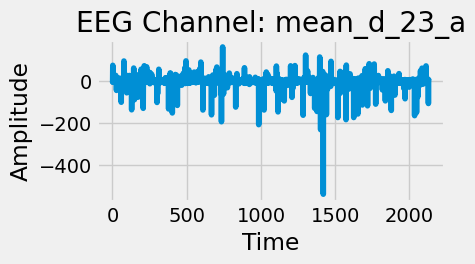

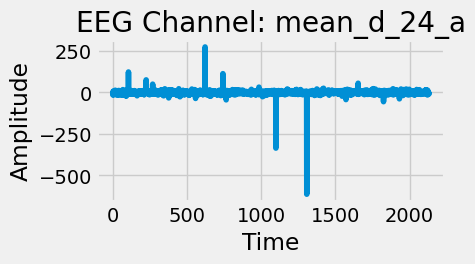

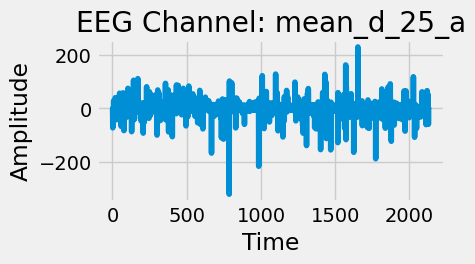

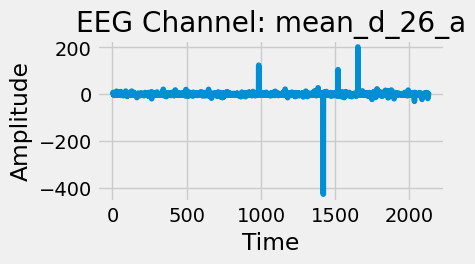

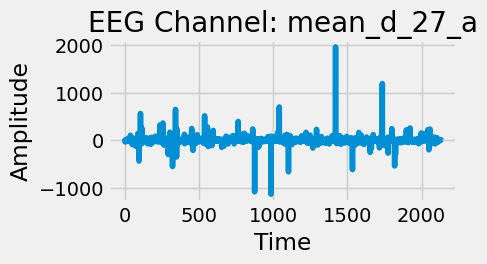

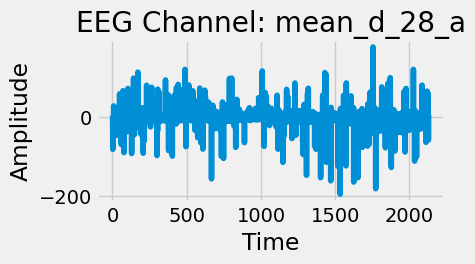

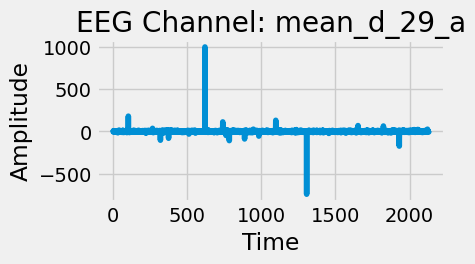

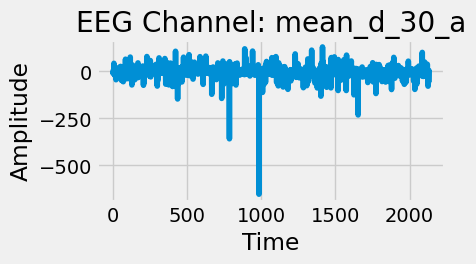

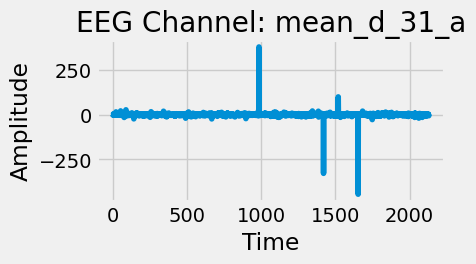

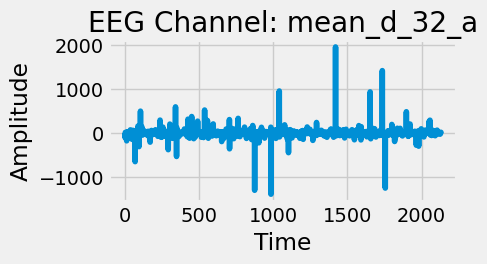

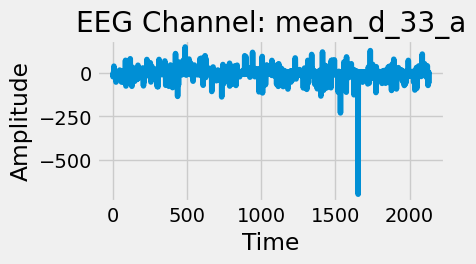

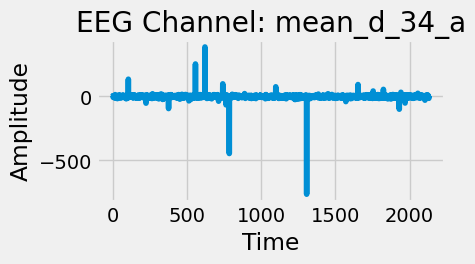

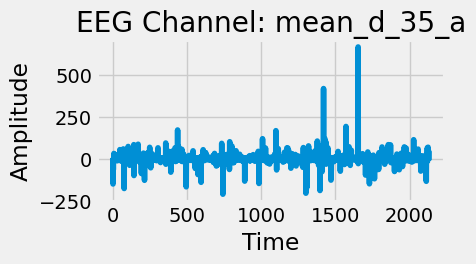

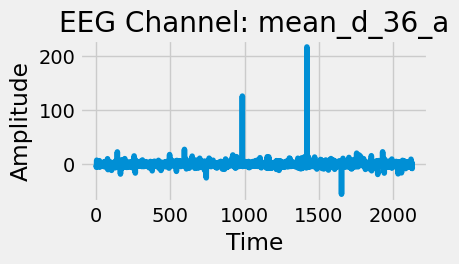

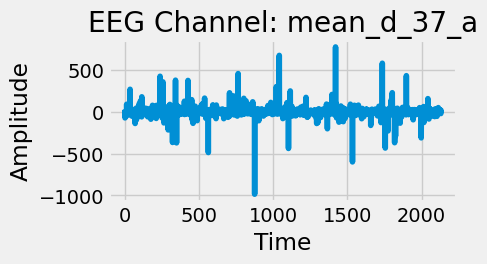

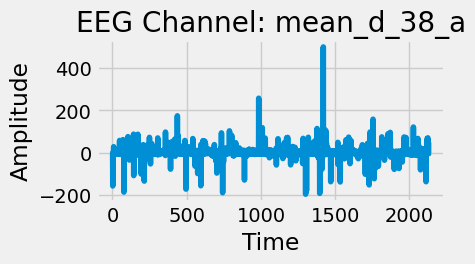

In [ ]:
eeg_channels = df.columns[1:49]
for channel in eeg_channels:
    plt.figure(figsize=(4, 2))
    plt.plot(df[channel])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('EEG Channel: ' + channel)
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop('label', axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#logistic Regression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Logistic=accuracy_score(y_test,y_pred)

In [ ]:
#Random Forest
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Random=accuracy_score(y_test,y_pred)

In [ ]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Decision=accuracy_score(y_test,y_pred)

In [ ]:
#Support Vector Machine
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
Support=accuracy_score(y_test,y_pred)

In [ ]:

#KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
knn=accuracy_score(y_test,y_pred)

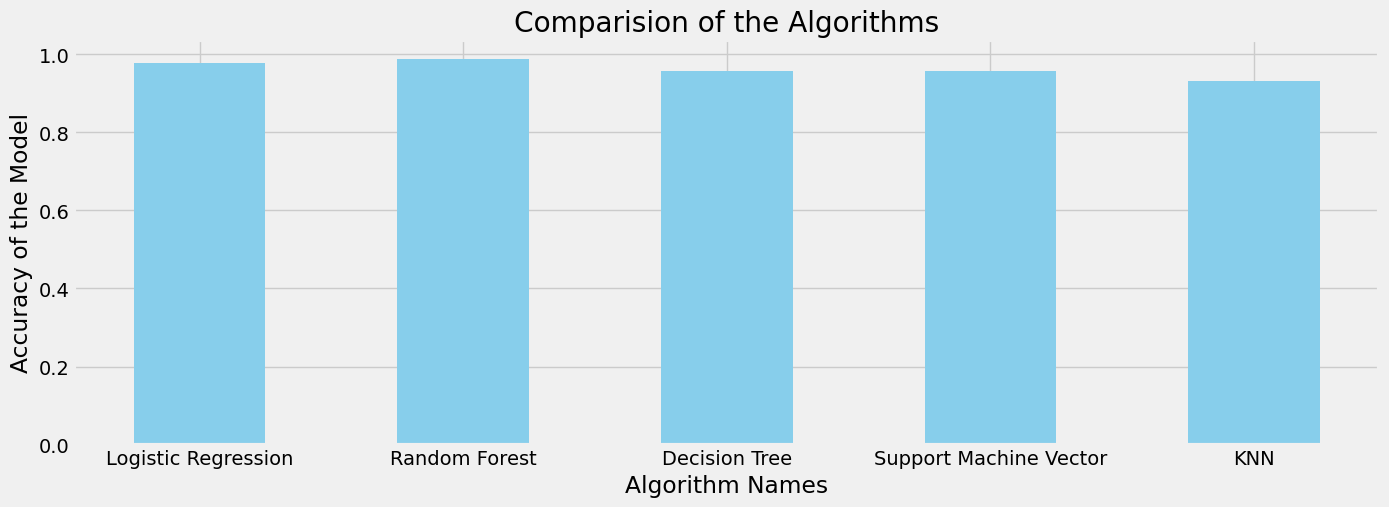

In [ ]:
fig = plt.figure(figsize = (15, 5))
plt.bar(["Logistic Regression","Random Forest","Decision Tree","Support Machine Vector","KNN"],[Logistic,Random,Decision,Support,knn],color='skyblue',width=0.5)
plt.xlabel("Algorithm Names")
plt.ylabel("Accuracy of the Model")
plt.title("Comparision of the Algorithms")
plt.show()

In [ ]:
print(Logistic,Random,Decision,Support,knn)

0.9765807962529274 0.9882903981264637 0.9578454332552693 0.9578454332552693 0.9320843091334895
